# **Project: Employee Satisfaction Sailfort Motors**
---
comissioned

## Description and deliverables

This notebook includes the code to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

also, a

- Summary of results including what as the issue or problem, responce to it, how it may impact and key insights.

The deliverables, will include: the model evaluation (and interpretation if applicable), a data visualization(s) related to the question we ask, ethical considerations, and resources used to troubleshoot and find answers or solutions.


# Iterative Stages.

Plan. Understand data in the problem context

Analyse. Exploratory data analysis, check model assumptions and select a model

Construct and evaluate the model

Execute. Interpret models and share history

## **Plan**

### Business scenario and problem

It is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to Salifort Motors.

The HR department at **Salifort Motors** wants to take some initiatives to improve **employee satisfaction** levels at the company. 
They collected data from employees. Looking to provide data-driven suggestions based on your understanding of the data.

- What’s likely to make the employee leave the company?

If we can predict employees likely to quit, it might be possible to identify the **factors** that contribute to their leaving. 



[Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭💭💭💭💭💭💭💭💭💭💭
### Usefull reflection questions for the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? links.
- Do you have any ethical considerations in this stage?
- What is the expected result.

The following projects has been comissioned by The HR department at Salifort Motors.
It includes EDA and has the goal to analyze the data collected by the HR department.
I will build a model that predicts whether or not an employee will leave the company.
Some of modules and libreries used:
- [Pandas](https://pandas.pydata.org/docs/reference/frame.html)
- [Numpy](https://numpy.org/doc/stable/reference/arrays.html)
- [Stats functions](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Statmodels api reference](https://www.statsmodels.org/stable/api.html)
- [Linear models](https://scikit-learn.org/stable/modules/linear_model.html)
- [Stochastic models trees](https://scikit-learn.org/stable/modules/tree.html)
- [Stochastic models ensemble](https://scikit-learn.org/stable/modules/ensemble.html)/
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)

### Ethical considerations:

**What are the ethical implications of the model?**

FN & FP: The model could uncorrectly classify employees that are not looking to leave as the opposite

**What are the consequences of your model making errors?**

Missinformation.

**What are the risks of using the model?**

Act with predisposition towards and outcome and obtaining the oposite result.

**Do the benefits of such a model outweigh the potential problems?**



**Would you proceed with the request to build this model? Why or why not?**



**Can the objective be modified to make it less problematic?**



**Who are the stakeholders involved in the project?**



**How will the model be used?**



**Is the data used representative of the population in which is intented to be used?**



**Is the model accountable?**

Yes.

**Is this model subject to human oversight?**

It is recommended.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [95]:
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import exploratory_data_analysis.eda_functions as eda

## for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings as cuidado
cuidado.filterwarnings('ignore')

## Setting view of the frames.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For saving models
import pickle

### Load dataset

In [2]:
## Loading dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

## Displaying few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)


### Gather basic information about the data

In [3]:
## Basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
## Descriptive statistics about the data

df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Renaming the columns

In [5]:
## new column names
new_columns_names = [
    'employee_satisfaction',
    'employee_evaluation',
    'active_projects',
    'average_hour_per_month',
    'tenure',
    'accident',
    'attrition',
    'promotion_last_5years', 
    'department', 
    'salary'
    ]

In [6]:
## Redefing columns.
df0.columns = new_columns_names
## view
df0.columns

Index(['employee_satisfaction', 'employee_evaluation', 'active_projects',
       'average_hour_per_month', 'tenure', 'accident', 'attrition',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing and invalid values

In [7]:
## Nan's
eda.miss_df(df0)

,Total,Percent
employee_satisfaction,0,0.0
employee_evaluation,0,0.0
active_projects,0,0.0
average_hour_per_month,0,0.0
tenure,0,0.0
accident,0,0.0
attrition,0,0.0
promotion_last_5years,0,0.0
department,0,0.0
salary,0,0.0


In [8]:
## Invalids
eda.get_invalid_values(df0)

,nulls,invalids,unique_item
employee_satisfaction,0,0,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
employee_evaluation,0,0,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
active_projects,0,0,"[2, 5, 7, 6, 4, 3]"
average_hour_per_month,0,0,"[157, 262, 272, 223, 159, 153, 247, 259, 224, ..."
tenure,0,0,"[3, 6, 4, 5, 2, 8, 10, 7]"
accident,0,0,"[0, 1]"
attrition,0,0,"[1, 0]"
promotion_last_5years,0,0,"[0, 1]"
department,0,0,"[sales, accounting, hr, technical, support, ma..."
salary,0,0,"[low, medium, high]"


### Checking for duplicates and analysis

In [9]:
## Is there duplicated data?
not_duplicates = df0.shape == df0.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Duplicated data.') 
print(df0.duplicated().sum())

Duplicated data.
3008


In [10]:
## Inspect some rows containing duplicates as needed
dups = df0[df0.duplicated()]
dups.head()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
## Comparing duplicates stats against all-data stats
dups.describe()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,0.545765,0.713787,3.803856,203.349734,4.029920,0.106051,0.525266,0.038564
std,0.266406,0.182012,1.477272,54.467101,1.795619,0.307953,0.499444,0.192585
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,0.000000
25%,0.380000,0.540000,2.000000,151.000000,3.000000,0.000000,0.000000,0.000000
50%,0.530000,0.725000,4.000000,204.000000,3.000000,0.000000,1.000000,0.000000
75%,0.780000,0.880000,5.000000,253.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
## all the data minus the duplicate data
df0[~df0.duplicated()].describe()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


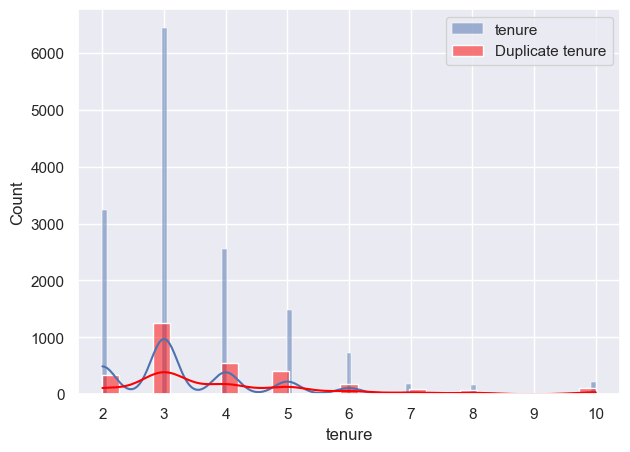

In [13]:
## Obvserving the distribution of the tenure, both from duplicate
## and non duplicate.
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2 = sns.histplot(df0['tenure'], kde=True, label='tenure',)
ax2 = sns.histplot(dups['tenure'], kde=True, color='Red', label='Duplicate tenure')
ax2.legend();

### Notes, 
the features `tenure`, `accident`, `attrition`, `promotion_last_5years`
have difference in the means, not sure if is statistically significant yet.

The distributions of the duplicates seems similar, should not be a problem
dropping the duplicates.

In [14]:
## Droping duplicates and saving resulting dataframe in a new variable df1
df1 = df0.drop_duplicates(keep='first')
## check
df1.head(2)

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [15]:
df1.describe()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Checking for outliers

What is an outlier in this case?

If we observe the statistics, we can notice the following:

- `employee_satisfaction`, and `employee_evaluation` are between 0.09 and 1, both continious.
- `active projects`, Does not seem out of the ordinary, but 7 projects seems busy. Although by definition a continious variable, I wonder if pretend that is ordinal comes more handy.
- `average_hour_per_month`, 
   - 40 hrs per week. times 4 weeks is **160hrs**
   - **310hrs** per month as an average seems very high, it would be like 11 hours per 7 day weeks, so the whole time working.
   - or 6 days on, one day off at 13 hrs day.
   - or 5 days on, two days off at 15.5 hrs day!!! poor person working so hard.
   
If this is correct, I would recommend hire 2 more employees to assist in the area where the 310hrs are.
at 40 hrs week both new emplyees could also absorve the high level of projects.

- `tenure`, 10 year is not an outlier. Some jobs are careers for a life time, and ten does not seem off for a human.
- `attrition`, Binary 1, means a chicken gonner.
- `promotion_last_5years`, Yes/no situation.
- `department`, Nominal, different departaments that make Saliford Motors.
- `salary`, there are three categories, low, medium, high. 

We should be able to find less, descriptive ways to describe the three categories. 

I think that maybe the average of work hours per month have outliers.
Ten years at the same job is not strange, therefore maybe not an outlier. Perhaps we can transform the variable to its log.


Check for outliers in the data...

Some considerations.
- Stochastic models like Random forest are not as affected as linear models, like linear models.
- Deterministic models do not deal as well with outliers as tree models.

In [16]:
df1.columns

Index(['employee_satisfaction', 'employee_evaluation', 'active_projects',
       'average_hour_per_month', 'tenure', 'accident', 'attrition',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

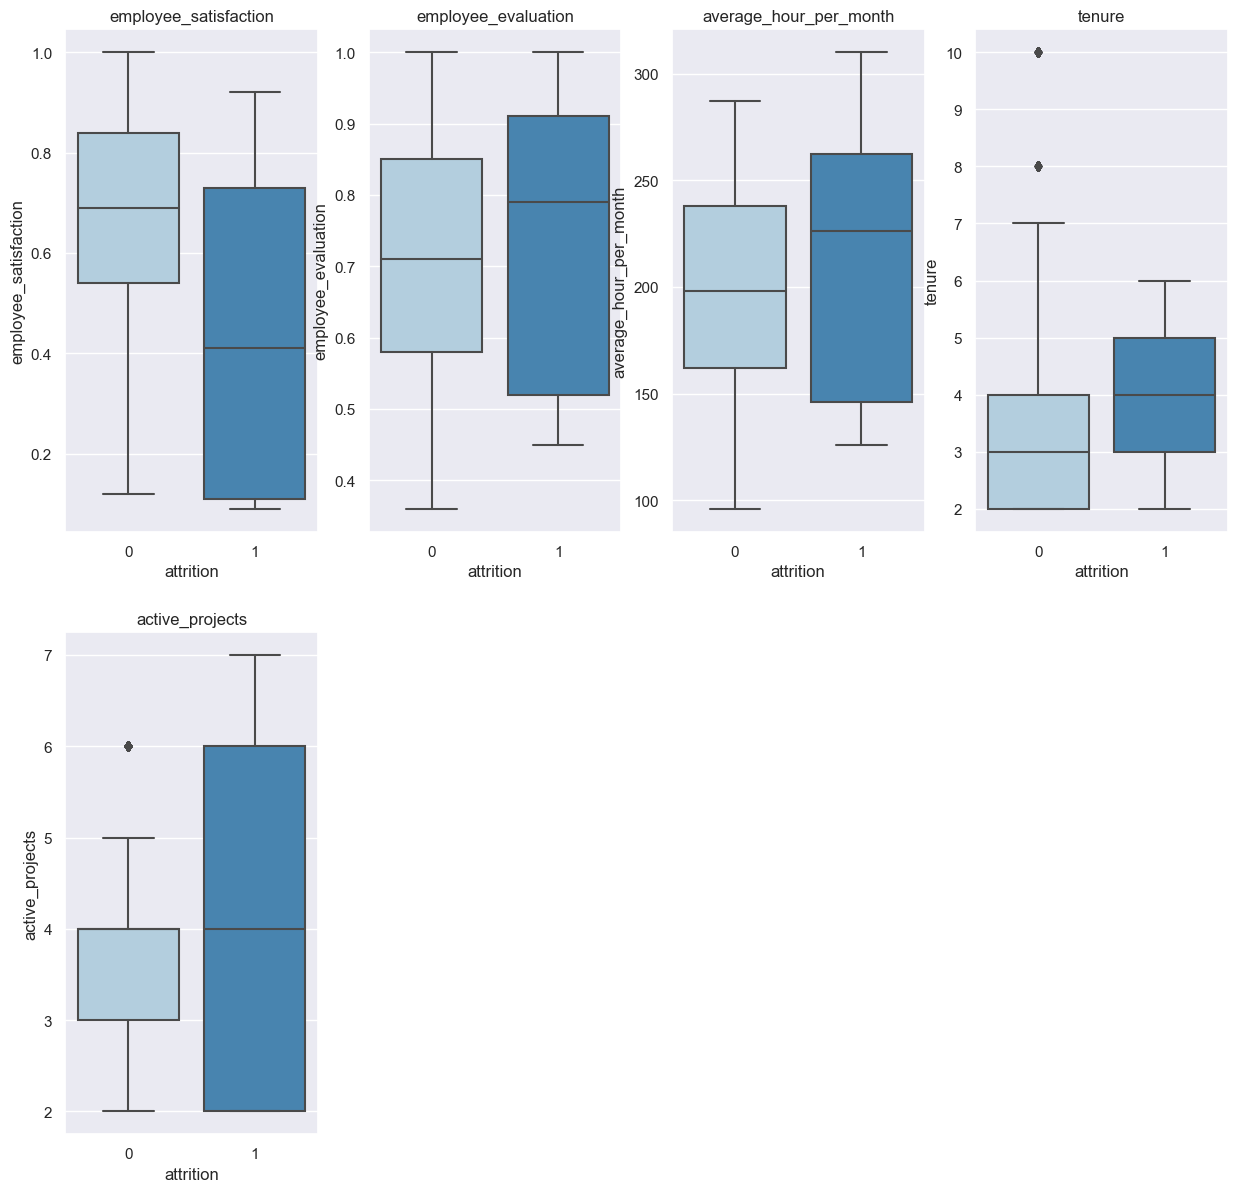

In [17]:
## Boxplot to visualize distributions and detect any outliers

cats = ['active_projects', 'accident', 'attrition', 'promotion_last_5years', 'departament', 'salary']
nums = ['employee_satisfaction', 'employee_evaluation', 'average_hour_per_month', 'tenure', 'active_projects']

plt.figure(figsize = (15,30))
for i,feature in enumerate(nums):
    ax = plt.subplot(4,4,i+1)
    sns.boxplot(y = df1[feature], x = df1['attrition'], palette='Blues')
    ax.set_title(feature)

### Notes:

- Since the graphs, we can observe difference in the means of observations and some hypothesis may come out.
    **Hypothesis:**
     - As an Average does the group that leave is statistically differente than the group that stays? in terms of:
         - `employee_satisfaction`
         - `employee_evaluationemployee_evaluation`
         - `average_hour_per_month`
         - `tenure`
         - `active_projects`

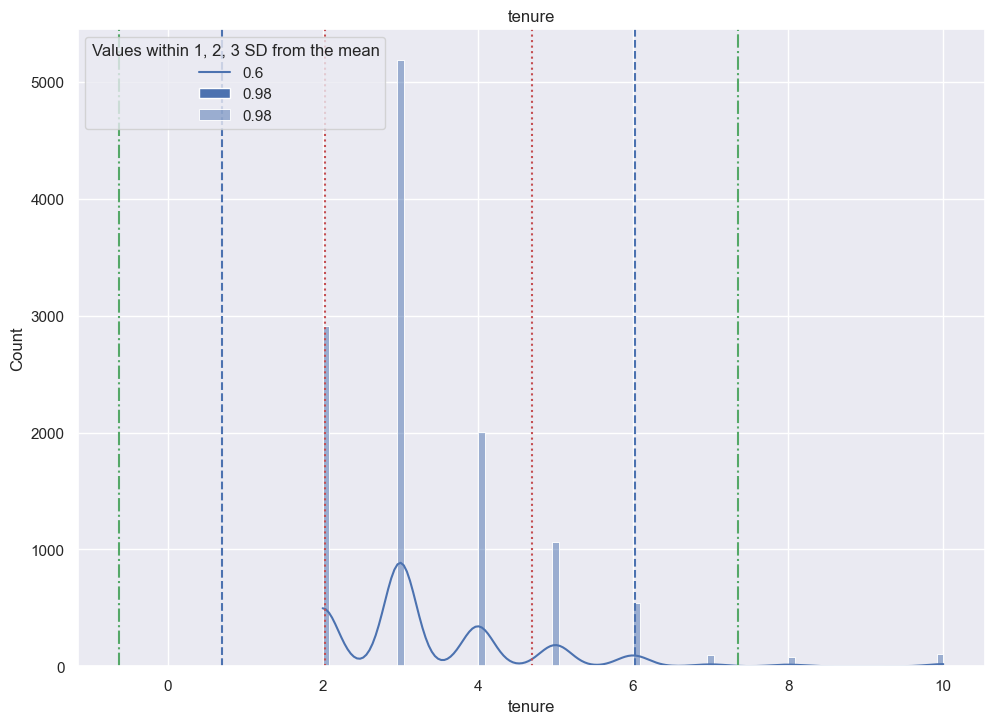

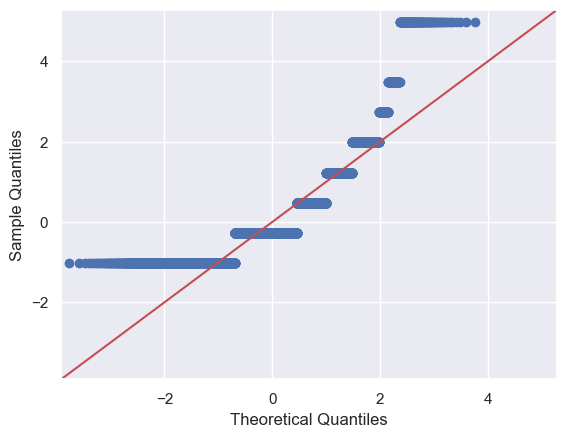

In [18]:
## Different view of tenure.

eda.distribution(df1, 'tenure')

In [19]:
## 25th percentile of tenure
## there is no outliers on the lower limit BTW, but still pointing the value.
percentile25 = df1['tenure'].quantile(0.25)
## 75th percentile of tenure
percentile75 = df1['tenure'].quantile(0.75)

## Interquartile range
iqr = percentile75 - percentile25

## Upper and lower thresholds for outliers
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print(f'Lower limit is: {lower_limit}')
print(f'Upper limit is: {upper_limit}')

Lower limit is: 1.5
Upper limit is: 5.5


In [20]:
## Determine the number of rows containing outliers
upper = df0[df0['tenure'] > upper_limit ]
lower = df0[df0['tenure'] < lower_limit ]
## Calculate rows with "outliers"
print(upper.shape[0] + lower.shape[0])

1282


In [21]:
### upper statistics
upper.describe()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,0.624657,0.734977,4.016381,205.946178,7.067083,0.177067,0.163027,0.061622
std,0.253760,0.176406,1.085946,49.996684,1.478503,0.381874,0.369534,0.240562
min,0.120000,0.360000,2.000000,97.000000,6.000000,0.000000,0.000000,0.000000
25%,0.470000,0.600000,3.000000,164.000000,6.000000,0.000000,0.000000,0.000000
50%,0.665000,0.760000,4.000000,215.000000,6.000000,0.000000,0.000000,0.000000
75%,0.830000,0.890000,5.000000,248.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000,1.000000,1.000000,1.000000


In [22]:
## confirming that the lower limit had no outliers
lower.head()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years,department,salary


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

### Before moving forward lets check at a log transformation

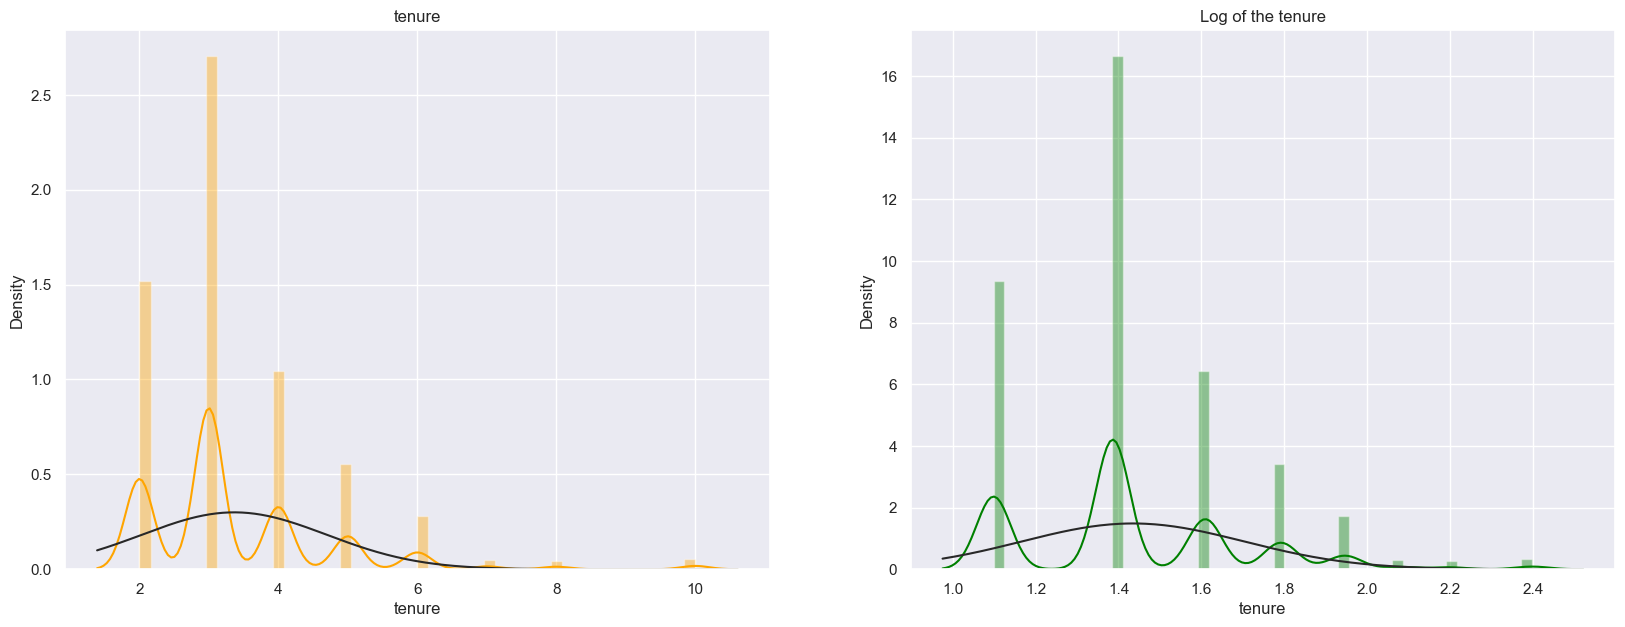

In [23]:
## compare dist to the log
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.distplot(df1['tenure'], kde=True, fit=scipy.stats.norm , color='Orange')
plt.title('tenure')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df1['tenure']), kde=True, fit=scipy.stats.norm, color='Green') ## fits is deprecated, still good to demo.
plt.title('Log of the tenure');

### Lets compare against the empirical rule

In [24]:
## comparing to the emrical rule.
## Adding the log of the tenure to de df.

df1['log'] = np.log1p(df1['tenure'])

In [25]:
## comparing the feature to the empirical rule and the difference
eda.empirical(df1, 'tenure')

,tenure,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.60,0.680,0.080
Frac of the values within +/- 2 SD from the mean,0.98,0.950,0.030
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


In [26]:
## comparing the feature to the empirical rule and the difference
eda.empirical(df1, 'log')

,log,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.60,0.680,0.080
Frac of the values within +/- 2 SD from the mean,0.98,0.950,0.030
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


In [27]:
## Descriptor of central tendency
df1[['tenure', 'log']].describe()

,tenure,log
count,11991.000000,11991.000000
mean,3.364857,1.434935
std,1.330240,0.268527
min,2.000000,1.098612
25%,3.000000,1.386294
50%,3.000000,1.386294
75%,4.000000,1.609438
max,10.000000,2.397895


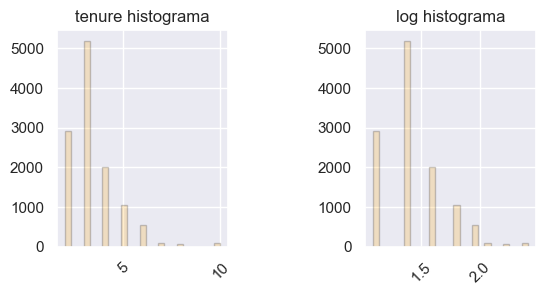

In [28]:
## Distribution
eda.histogramas(df1, ['tenure', 'log'])

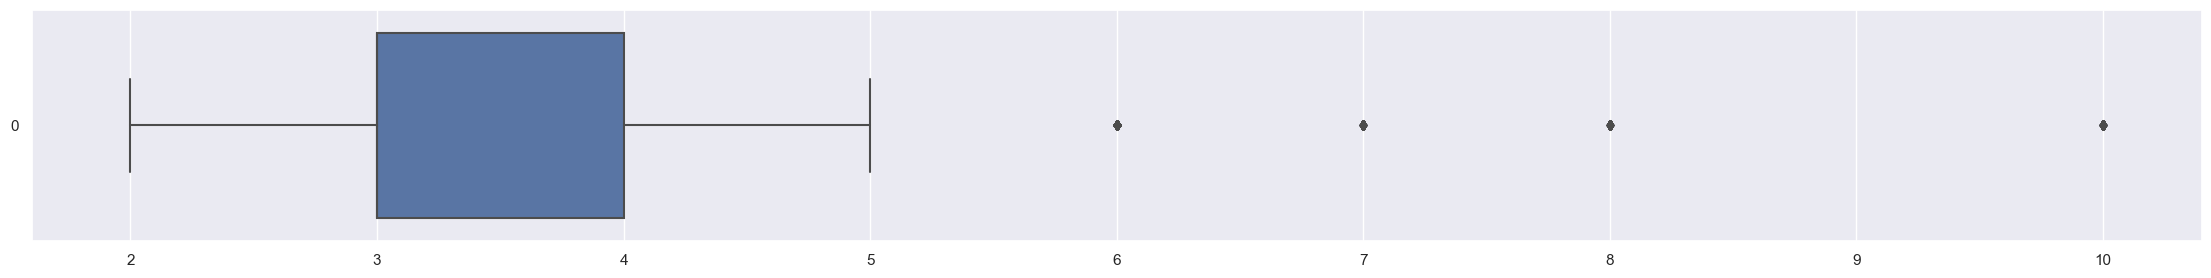

In [29]:
## No big difference.
plt.figure(figsize = (28, 3))
sns.boxplot(data=df1['tenure'], orient='h');

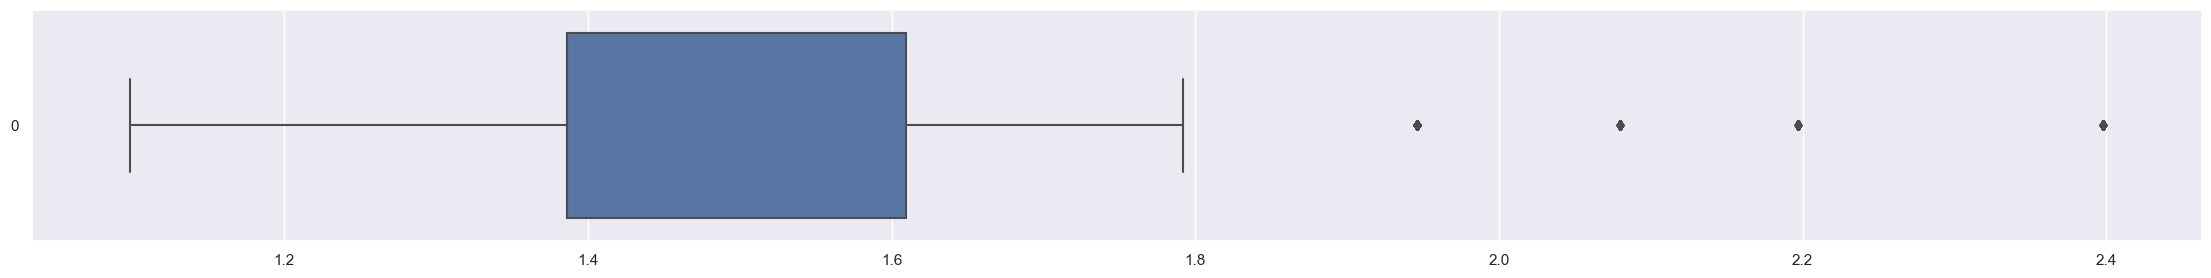

In [30]:
## No big difference.
plt.figure(figsize = (28, 3))
sns.boxplot(data=df1['log'], orient='h');

### Notes and observations from the all the done so far:
#### We have observe the continious variables and and its means in relation to attrition.

- Since the **log** of tenure does not change that much in term of the shape of the distribution, no change is necesary.
- Since the graphs, we can observe difference in the means of observations and some hypothesis may come out.
    **Hypothesis:**
     - As an Average does the group that leave is statistically differente than the group that stays? in terms of:
         - `employee_satisfaction`
         - `employee_evaluationemployee_evaluation`
         - `average_hour_per_month`
         - `tenure`
         - `active_projects`

We will look into this in a bit. 

つづく...


## Analyze Stage, 
although it already started before

• What was observed about the relationships between variables? 

While attritionhe average of:
    `employee_evaluation`
    `average_our_per_month`
    `tenure`, and
    `active_project `
    that `attrition` is equal to one, are higher.
    As expected as an average employee satisfaction is lower in the ones that leave.
      
• What do you observe about the distributions in the data? 
      Pretty normal, to normal-skew 
    
• What transformations did you make with your data? Why did you chose to make those decisions? 
💭💭      
• What are some purposes of EDA before constructing a predictive model? 
  Standardization of the data to requirements.
    
• What resources do you find yourself using as you complete this stage? (Make sure to include the links.) 
💭💭
• Do you have any ethical considerations in this stage? 
💭💭

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

We can ask our self the following questions

1) what is the split of `attrition`
2) what is the split of attrition by `active_projects`
3) what is the split of attrition by `accidents`
4) what is the split of attrition by `promotion_last_5years`
5) what is the split of attrition by `departament`

0    10000
1     1991
Name: attrition, dtype: int64
0    0.833959
1    0.166041
Name: attrition, dtype: float64


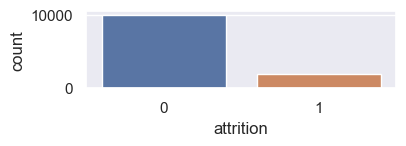

In [31]:
## What is the number of employees that has left since this data has been colected?
plt.figure(figsize=(4, 1))
sns.countplot(x=df1['attrition']);
print(df1['attrition'].value_counts())
print(df1['attrition'].value_counts(normalize=True))

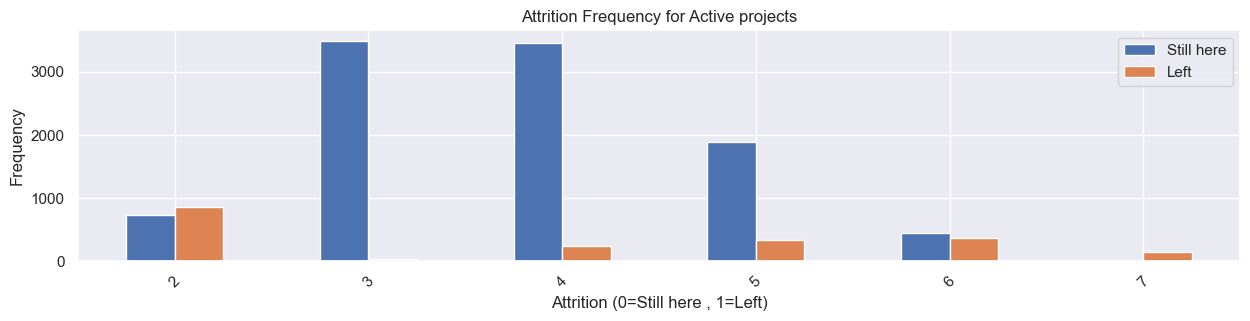

In [32]:
## What is the split of attrition by active project...
## Active project smells important.
pd.crosstab(df1['active_projects'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for Active projects')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Still here", "Left"])
plt.ylabel('Frequency')
plt.show()


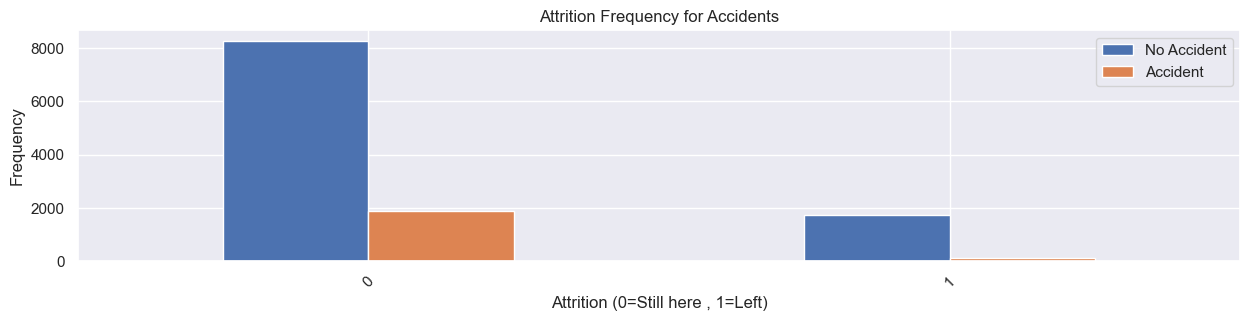

In [33]:
pd.crosstab(df1['accident'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for Accidents')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["No Accident", "Accident"])
plt.ylabel('Frequency')
plt.show()

### Data visualizations

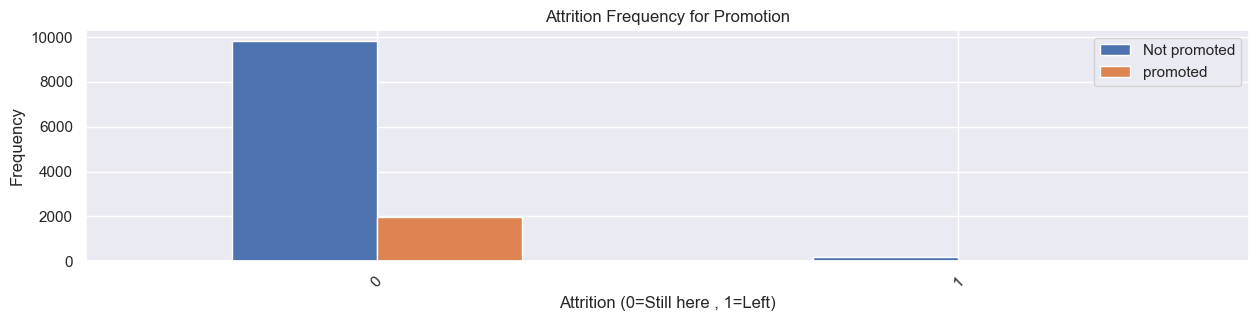

In [34]:
pd.crosstab(df1['promotion_last_5years'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for Promotion')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Not promoted", "promoted"])
plt.ylabel('Frequency')
plt.show()

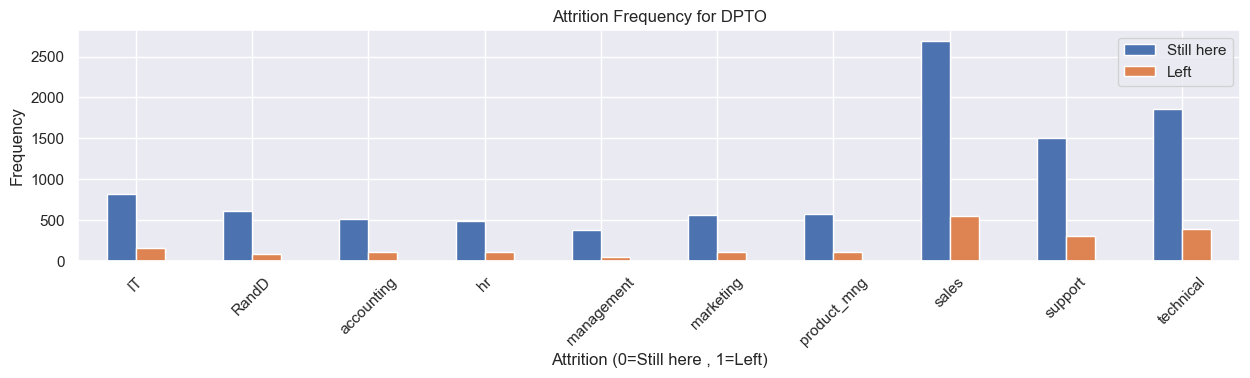

sales          2689
technical      1854
support        1509
IT              818
RandD           609
product_mng     576
marketing       561
accounting      512
hr              488
management      384
Name: department, dtype: int64
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: department, dtype: int64


In [68]:
## What is the split of attrition by departament...
## Important so we can delegate resources properlly

pd.crosstab(df1['department'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for DPTO')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Still here", "Left"])
plt.ylabel('Frequency')
plt.show()

print(df1[df1['attrition']==0]['department'].value_counts())
print(df1[df1['attrition']==1]['department'].value_counts())

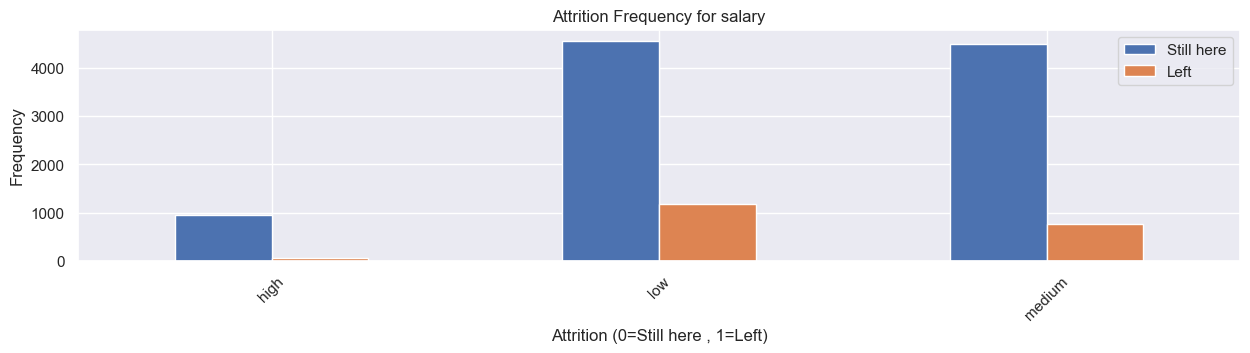

In [51]:
## What is the split of attrition by salary...
## Important so we can delegate resources properlly

pd.crosstab(df1['salary'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for salary')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Still here", "Left"])
plt.ylabel('Frequency')
plt.show()

### Notes

so far, 

From the **countplots** we can see that 

- all people with 7 projects left.
- Department `sales`, `support` and `technical` has the higher amount of attrition.


Usually people that have lots of projects work more hours lets look into that:

We can ask:

How many people left that have 7 projects on hand?


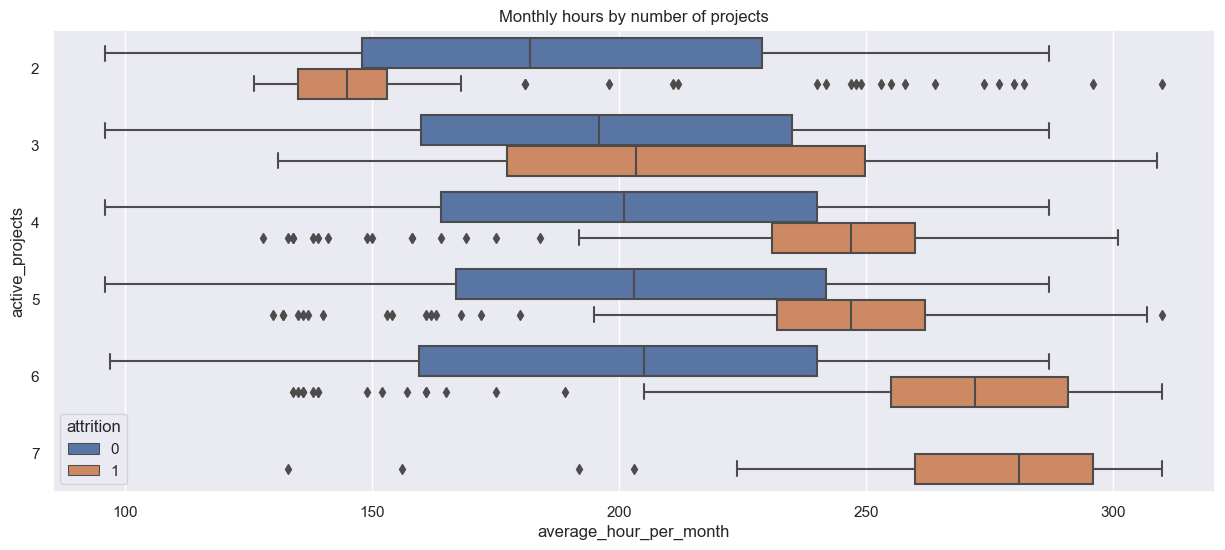

In [39]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.boxplot(data = df1, x='average_hour_per_month',y='active_projects', hue = 'attrition', orient = 'h')
#ax.invert_yaxis()
ax.set_title('Monthly hours by number of projects', fontsize = '12');

In [104]:
## All 145 people that took 7 project has left... maybe no more 7 project for anyone.
df1[df1['active_projects'] == 7]['attrition'].value_counts()

1    145
Name: attrition, dtype: int64

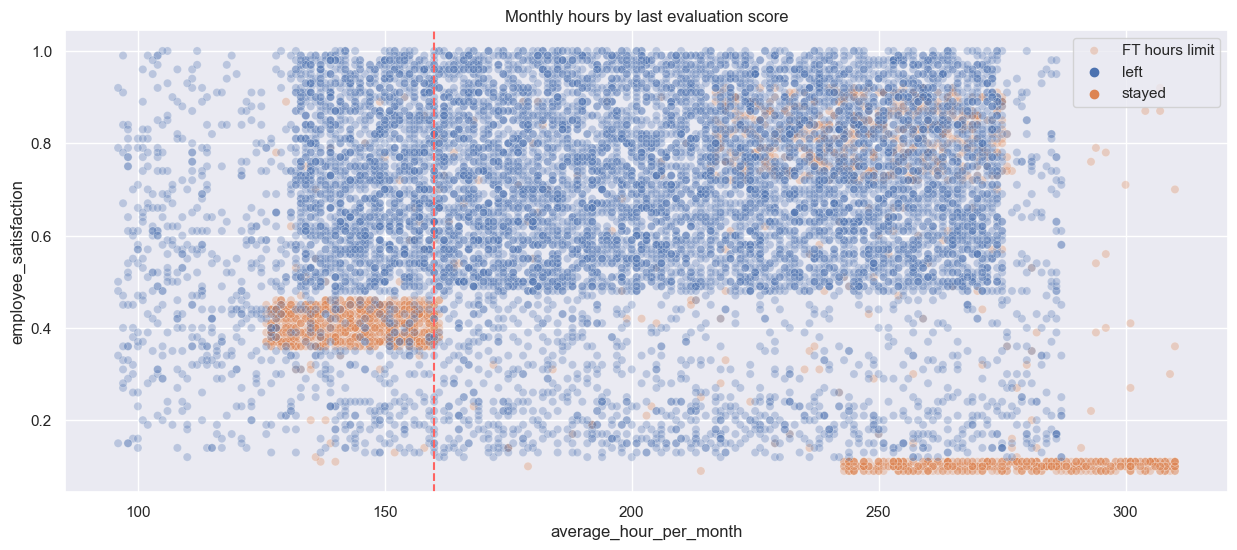

In [56]:

## Scatterplot of 'average_monthly_hours' versus 'satisfaction_level',
## comparing employees who stayed versus those who left

plt.figure(figsize = (15, 6))
sns.scatterplot(data = df1, x='average_hour_per_month',y='employee_satisfaction',
               hue='attrition', alpha = 0.3)
plt.axvline(x = 160, color = '#ff6361', label = '160 hrs./mo.', ls = '--')
plt.legend(labels =['FT hours limit', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '12');

#### Some other important questions

- how does the number of projects and employee satisfaction affect attrition?

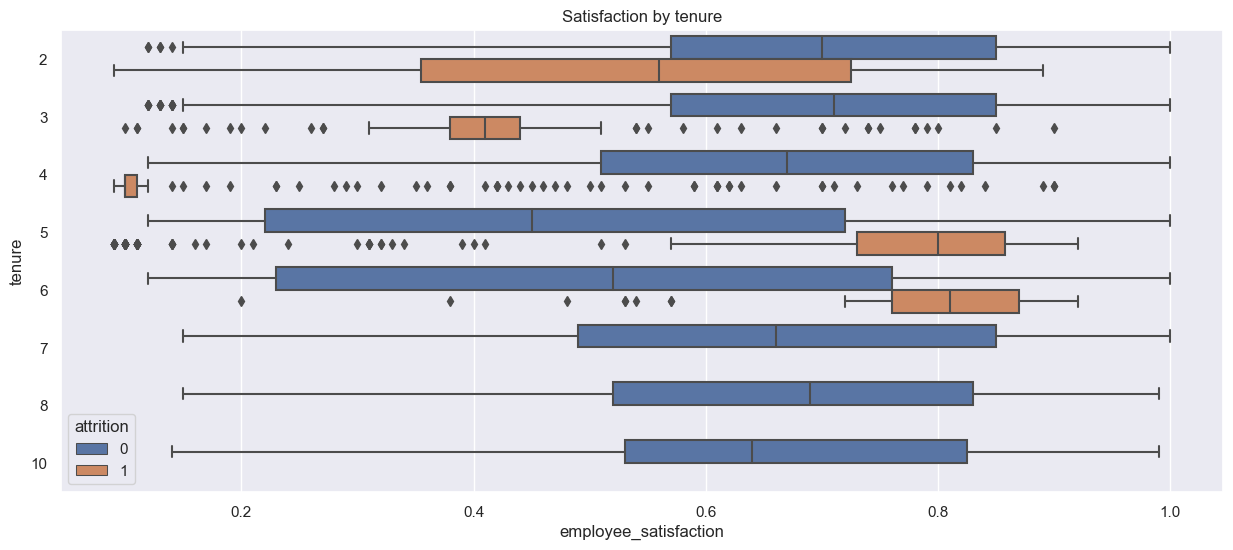

In [48]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.boxplot(data = df1, x='employee_satisfaction',y='tenure', hue = 'attrition', orient = 'h')
#ax.invert_yaxis()
ax.set_title('Satisfaction by tenure', fontsize = '12');

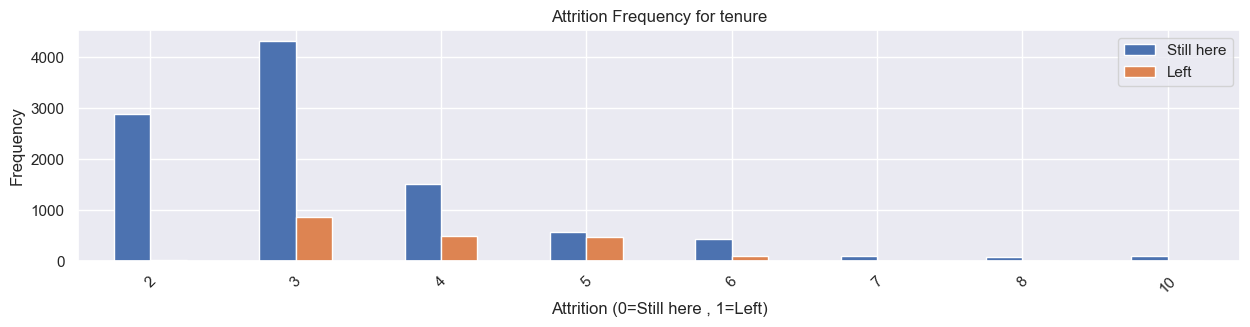

In [47]:
## What is the split of attrition by tenure...
pd.crosstab(df1['tenure'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for tenure')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Still here", "Left"])
plt.ylabel('Frequency')
plt.show()

In [50]:
df1.groupby(['attrition'])['employee_satisfaction'].agg([np.mean, np.median])

,mean,median
attrition,,
0,0.667365,0.69
1,0.440271,0.41


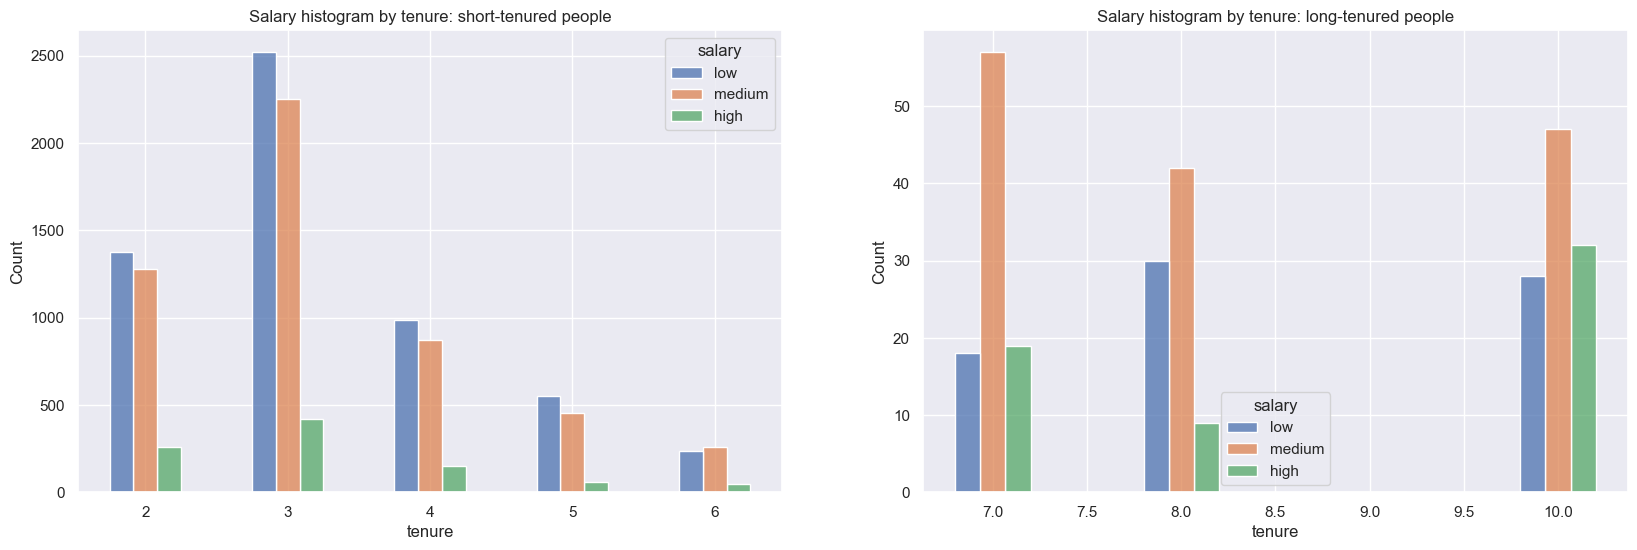

In [58]:
### Creating a comparation graph
## Selecting tenure over 7 and under 6
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

## Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]
## Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5,
            ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = '12')

# Plot long-tenured histogram
sns.histplot(data = tenure_long,  x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low','medium', 'high'], multiple = 'dodge', shrink = .4,
            ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize = '12');

In [60]:
df1.columns

Index(['employee_satisfaction', 'employee_evaluation', 'active_projects',
       'average_hour_per_month', 'tenure', 'accident', 'attrition',
       'promotion_last_5years', 'department', 'salary', 'log'],
      dtype='object')

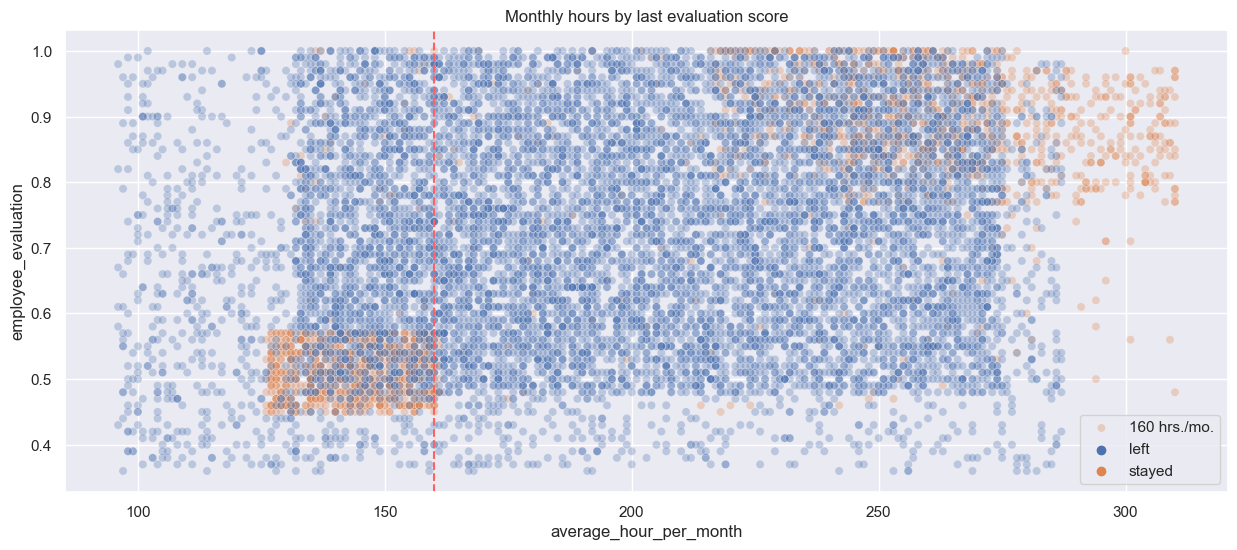

In [63]:
## scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df1, x = 'average_hour_per_month', y = 'employee_evaluation',
               hue = 'attrition', alpha = 0.3)
plt.axvline( x = 160, color = '#ff6061', label = '160 hrs./mo.', ls = '--')
plt.legend(labels = ['160 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '12');

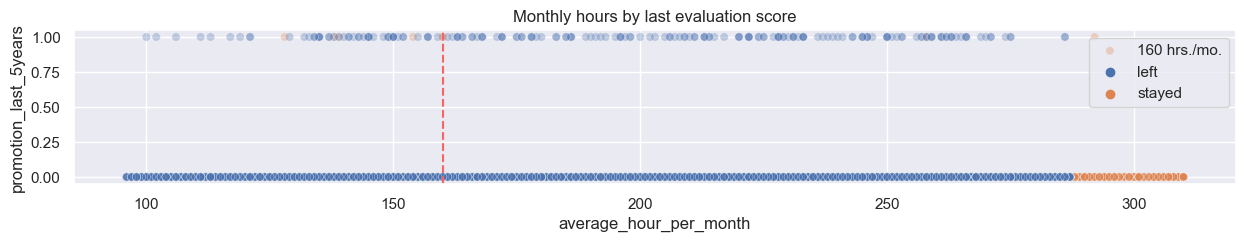

In [69]:
## scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize = (15, 2))
sns.scatterplot(data = df1, x = 'average_hour_per_month', y = 'promotion_last_5years',
               hue = 'attrition', alpha = 0.3)
plt.axvline( x = 160, color = '#ff6061', label = '160 hrs./mo.', ls = '--')
plt.legend(labels = ['160 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '12');

### Parlson coorelation


In [71]:
total_corr = np.abs(df1.corr().loc['attrition']).sort_values(ascending=False)
corr_df = pd.DataFrame(total_corr)
corr_df

,attrition
attrition,1.000000
employee_satisfaction,0.350558
log,0.217945
tenure,0.173295
accident,0.125436
average_hour_per_month,0.070409
promotion_last_5years,0.044657
active_projects,0.030928
employee_evaluation,0.013520


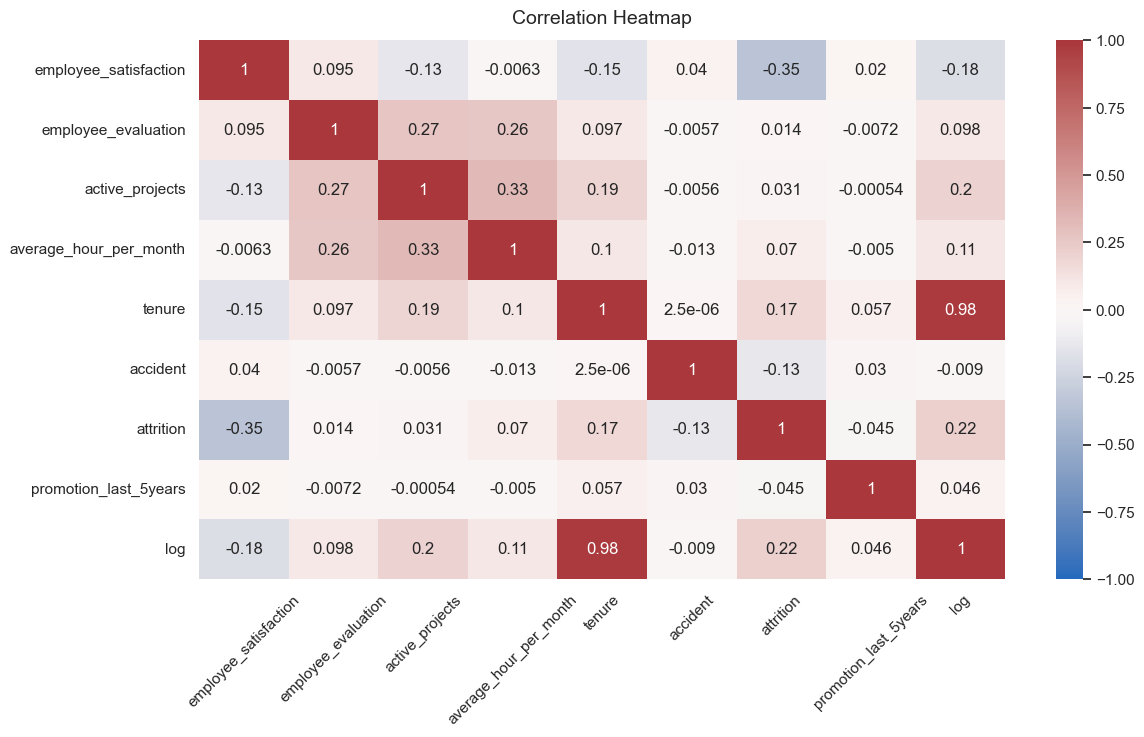

In [76]:
plt.figure(figsize=(13, 7))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
plt.xticks(rotation=45);

### Insights

It seems like there is some miss usage of humar resources.
or overuse, seems people is working overtime in all areas.
Seems high percentage have more than 3 projects going with a maximun of 7, too many per people, perhaps.
Quality may be affected as well, but that is a different issue.


# Construct Stage
---
We are looking to:

- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Model assumptions

**Logistic Regression model assumptions**

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflective questions when constructing models.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Identify the type of prediction task.

Binary classification.

### Identify the types of models most appropriate for this task.

Approach one, Linear:
- Logistic regression

Approach 2, Stochastic:
- desicion trees
- RF
- XGBoost

# Modeling, 

#### Each of the two aproaches will look into the following:

1.  Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

2. Obtain evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.


💭
3. Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders
5. Summary of model results
6. Conclusion, Recommendations, Next Steps



# Linear models:
- logistic regression
- SVM
---

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.


In [77]:
## Copy the dataframe
df_enc = df1.copy()

## Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

## Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

## Display the new dataframe
df_enc.head()

,employee_satisfaction,employee_evaluation,active_projects,average_hour_per_month,tenure,accident,attrition,promotion_last_5years,salary,log,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1.386294,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,1.945910,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,1.609438,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1.791759,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1.386294,0,0,0,0,0,0,0,1,0,0


In [79]:
df_enc.columns

Index(['employee_satisfaction', 'employee_evaluation', 'active_projects',
       'average_hour_per_month', 'tenure', 'accident', 'attrition',
       'promotion_last_5years', 'salary', 'log', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

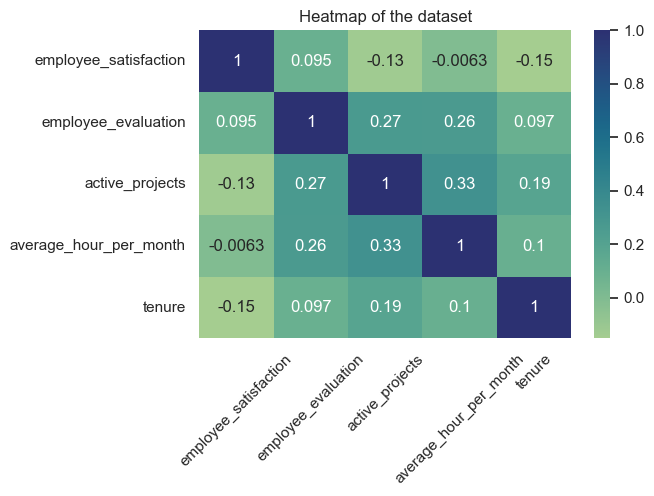

In [84]:
## # Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6, 4))
sns.heatmap(df_enc[['employee_satisfaction', 'employee_evaluation', 'active_projects', 'average_hour_per_month', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.xticks(rotation=45);
plt.show()


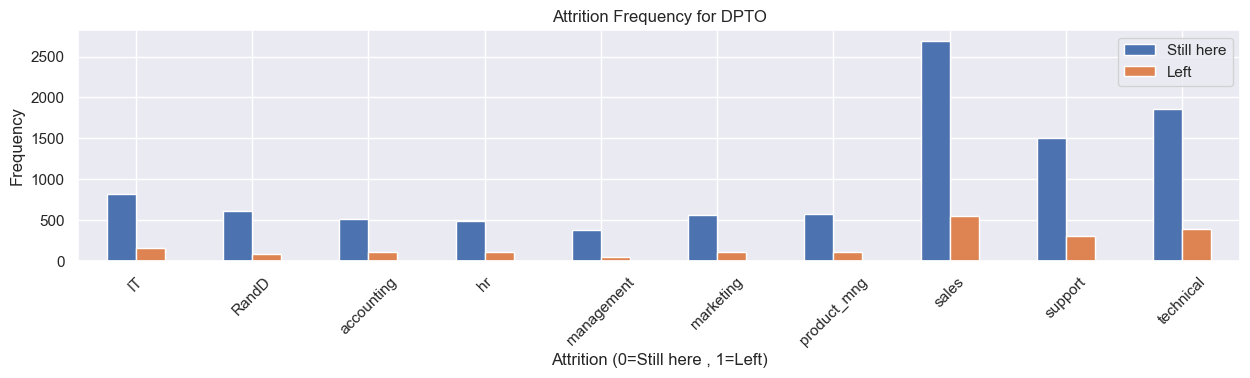

sales          2689
technical      1854
support        1509
IT              818
RandD           609
product_mng     576
marketing       561
accounting      512
hr              488
management      384
Name: department, dtype: int64
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: department, dtype: int64


In [85]:
## What is the split of attrition by departament...
## Important so we can delegate resources properlly

pd.crosstab(df1['department'],df1['attrition']).plot(kind="bar",figsize=(15,3))
plt.title('Attrition Frequency for DPTO')
plt.xlabel('Attrition (0=Still here , 1=Left)')
plt.xticks(rotation=45)
plt.legend(["Still here", "Left"])
plt.ylabel('Frequency')
plt.show()

print(df1[df1['attrition']==0]['department'].value_counts())
print(df1[df1['attrition']==1]['department'].value_counts())

#### Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [87]:
## Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

## Select the independent and dependable variables.
X = df_logreg.drop('attrition', axis=1)
y = df_logreg['attrition']
 

In [90]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
## making sure everything is in the same format
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [92]:
## Model 1 
## Logistic Regression (linear classifier)
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.825


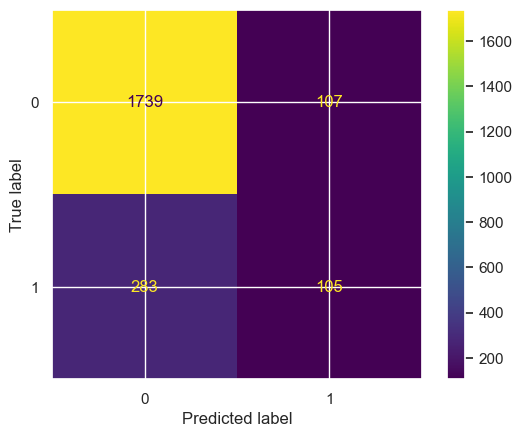

In [96]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, lr_predictions, labels=lr.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lr.classes_)
# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The number of people who did not leave that the model accurately predicted did not leave.

The upper-right quadrant displays the number of false positives.
The number of people who did not leave the model inaccurately predicted as leaving.

The bottom-left quadrant displays the number of false negatives.
The number of people who left that the model inaccurately predicted did not leave

The bottom-right quadrant displays the number of true positives.
The number of people who left the model accurately predicted as leaving


In [97]:
## Model 2
## Support Vector Machine (linear classifier)
## also pewformed a bit worst than logistic regression.
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.826


In [101]:
## Logistic regression report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, lr_predictions, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.50      0.27      0.35       388

                 accuracy                           0.83      2234
                macro avg       0.68      0.61      0.62      2234
             weighted avg       0.80      0.83      0.80      2234



# Tree models:
- Desicion trees
- Random Forest
- XGBoost
---

In [102]:
## Desicion Tree
## Select the independent and dependable variables.
X = df_enc.drop('attrition', axis=1)
y = df_enc['attrition']
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [103]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params =  {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [104]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 22.9 s, sys: 19.8 ms, total: 22.9 s
Wall time: 22.9 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [105]:
## Check best parameters
tree1.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [106]:
## Check best AUC score on CV
tree1.best_score_

0.9711243297785116

In [107]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [108]:
## Getting all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.942466,0.906971,0.924201,0.975148,0.971124


### Random forest

In [112]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    "n_estimators": [10, 50, 100, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [113]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 1h 52min 3s, sys: 3.62 s, total: 1h 52min 7s
Wall time: 1h 52min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [117]:
## Path where to save
path = '/home/scicat/Downloads/coursera/salifortMotors/'


In [115]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
        
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [118]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')
write_pickle(path, tree1, 'hr_tree1')

In [119]:
rf1.best_score_

0.9840585822249649

In [120]:
# Check best params
rf1.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [121]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.942466  0.906971  0.924201  0.975148  0.971124
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.986895  0.908297  0.945962  0.982648  0.984059


In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [122]:
## Getting predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.983471,0.920103,0.950732,0.983438,0.958426


---

#### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [125]:
df_enc.columns[:10]

Index(['employee_satisfaction', 'employee_evaluation', 'active_projects',
       'average_hour_per_month', 'tenure', 'accident', 'attrition',
       'promotion_last_5years', 'salary', 'log'],
      dtype='object')

In [127]:
## Dropping `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('employee_evaluation', axis=1)

In [129]:
## create a binary feature based on > 175 hrs per month
df2['overworked'] = (df2['average_hour_per_month'] > 175).astype(int)

In [ ]:
## Dropping the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

In [130]:
## Desicion Tree
## Select the independent and dependable variables.
X = df2.drop('attrition', axis=1)
y = df2['attrition']
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [133]:
## Instantiate model
tree = DecisionTreeClassifier(random_state=0)

## Assign a dictionary of hyperparameters to search over
cv_params =  {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
}
## Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

## Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [134]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 24 s, sys: 4 ms, total: 24 s
Wall time: 24 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [135]:
# Check best params
tree2.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [136]:
# Check best AUC score on CV
tree2.best_score_

0.9655181655699082

In [137]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.942466  0.906971  0.924201  0.975148  0.971124
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.857505  0.876733  0.866792  0.955298  0.965518


In [138]:
#### Random forest 2

In [139]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [140]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 1h 42min 54s, sys: 6.49 s, total: 1h 43min
Wall time: 1h 43min 1s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [141]:
## Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [142]:
## Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [143]:
## Check best params
rf2.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [144]:
## Check best AUC score on CV
rf2.best_score_

0.982010872006614

In [145]:
## Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.857505  0.876733  0.866792  0.955298  0.965518
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.963147  0.905559  0.933431  0.978539  0.982011


In [146]:
## Get predictions on test data
## the random forest performs better than the decision tree if using AUC as the deciding metric.
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.97397,0.901606,0.936392,0.979653,0.948403


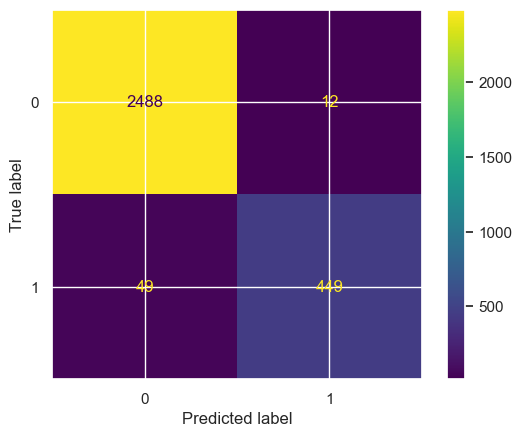

In [147]:
## Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

## Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

#### Some employees may be identified as at risk, when not the case.

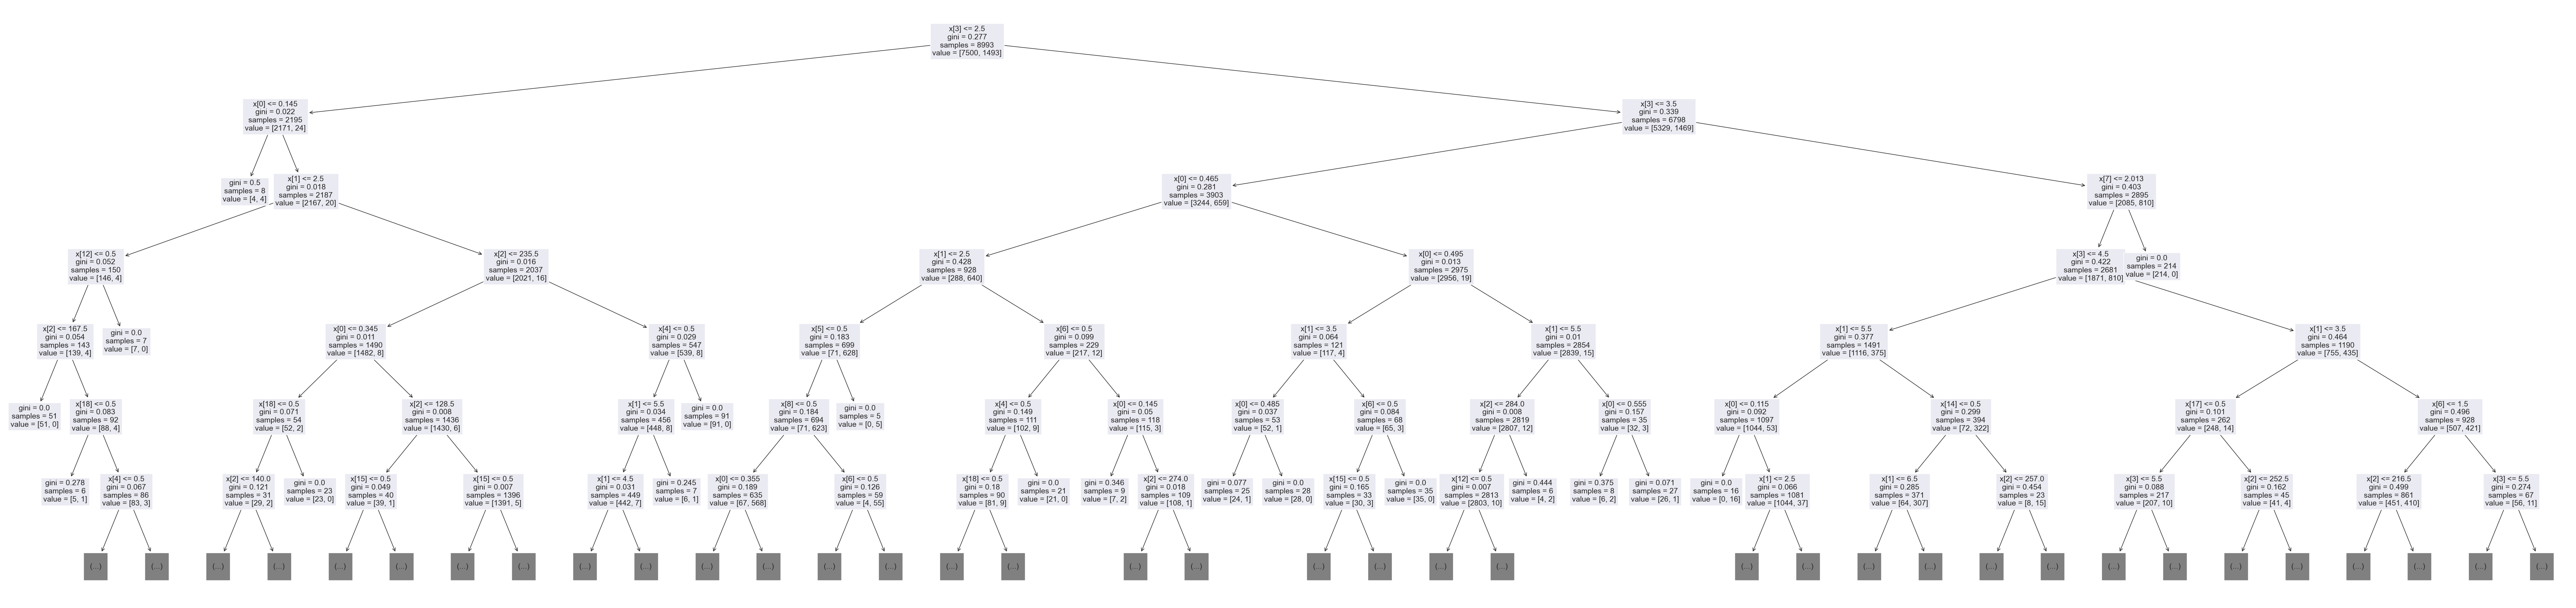

In [152]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14)#, max_depth=6, fontsize=14, feature_names=X.columns, filled=True);
          #class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [153]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
employee_satisfaction,0.411170
active_projects,0.359697
tenure,0.109241
average_hour_per_month,0.091492
log,0.019619
salary,0.006912
department_product_mng,0.000722
overworked,0.000528
accident,0.000232
department_sales,0.000137


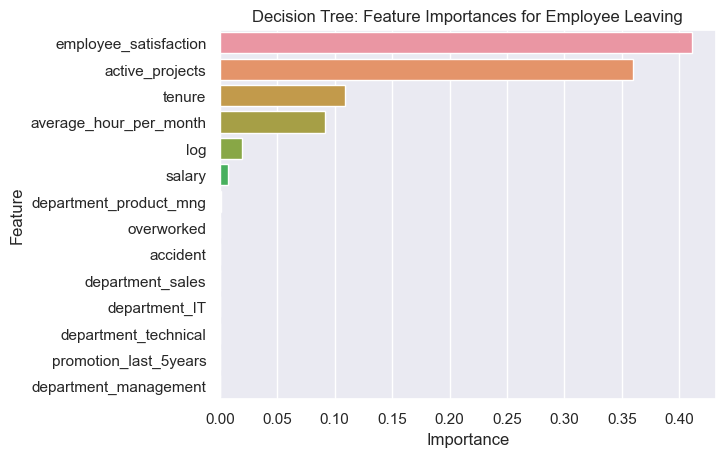

In [154]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random forest feature importance

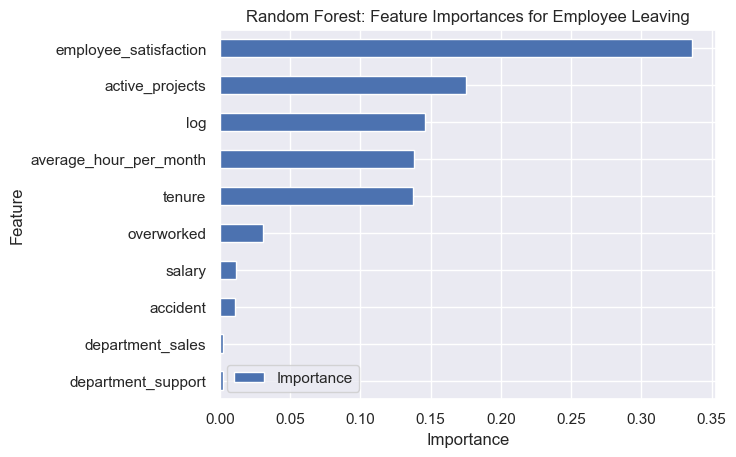

In [155]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.



### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 